In [1]:
import numpy as np
import pandas as pd
from shutil import copyfile
from matplotlib import gridspec
from astropy.io import fits
from astropy.table import Table
from spec_tools import Source_present, Get_Sensitivity
from spec_exam import Gen_beam_fits, Gen_DB_and_beams
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from glob import glob
import seaborn as sea
import os
from grizli import model as griz_model

from time import time
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [2]:
Gen_DB_and_beams(41520, 'south',53.152726,-27.716251)

/Users/Vince.ec/Clear_data/s_flt_files/icxt30s0q_flt.fits / blot reference /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol
Using default C-based coordinate transformation...
/Users/Vince.ec/Clear_data/s_flt_files/icxt30s0q_flt.fits / blot segmentation /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
/Users/Vince.ec/Clear_data/s_flt_files

In [2]:
gal_id = 41520 

In [8]:
filelist = glob(hpath + 'Clear_data/flt_files/*flt.fits')

In [85]:
n_flt = []
s_flt = []
i_flt = []

for i in range(len(filelist)):
    dat = fits.open(filelist[i])
    if dat[0].header['OBSTYPE'] == 'SPECTROSCOPIC' and dat[0].header['DEC_TARG'] < 0:
        s_flt.append(filelist[i])
        
    if dat[0].header['OBSTYPE'] == 'SPECTROSCOPIC' and dat[0].header['DEC_TARG'] > 0:
        n_flt.append(filelist[i])

    if dat[0].header['OBSTYPE'] == 'IMAGING':
        i_flt.append(filelist[i])

In [89]:
for i in s_flt:
    copyfile(i, '/Users/Vince.ec/Clear_data/s_flt_files/' + i.replace('/Users/Vince.ec/Clear_data/flt_files/',''))

for i in n_flt:
    copyfile(i, '/Users/Vince.ec/Clear_data/n_flt_files/' + i.replace('/Users/Vince.ec/Clear_data/flt_files/',''))

In [102]:
g104fs = glob('/Volumes/Vince_research/3DHST/goodsn_flt_files/*flt*')

In [103]:
s104_flt = []
i104_flt = []

for i in range(len(g104fs)):
    dat = fits.open(g104fs[i])
    if dat[0].header['OBSTYPE'] == 'SPECTROSCOPIC' and dat[0].header['DEC_TARG'] > 0:
        s104_flt.append(g104fs[i])

    if dat[0].header['OBSTYPE'] == 'IMAGING':
        i104_flt.append(g104fs[i])

In [105]:
for i in s104_flt:
    copyfile(i, '/Users/Vince.ec/3dhst/n_flt_files/' + i.replace('/Volumes/Vince_research/3DHST/goodsn_flt_files/',''))

In [106]:
len(s104_flt),len(i104_flt),len(g104fs),

(140, 126, 266)

In [4]:
RA,DEC = (53.152726, -27.716251)

flt_files = []
obj_pos =[]
for i in range(len(filelist)):
    pres,pos=Source_present(filelist[i],RA,DEC)
    if pres==True:
        obj_pos.append(pos)
        flt_files.append(filelist[i])

False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROSCOPIC
False SPECTROSCOPIC
False IMAGING
False SPECTROS

In [12]:
orients = []
for i in range(len(flt_files)):
    dat = fits.open(flt_files[i])
    orients.append(np.round(dat[0].header['PA_V3']).astype(int))

In [14]:
xpos,ypos = np.array(obj_pos).T

In [20]:
obj_DB = pd.DataFrame({'file' : flt_files, 'orient' : orients, 'xpos' : xpos, 'ypos' : ypos})

In [3]:
obj_DB= pd.read_pickle('../dataframes/file_list/{0}.pkl'.format(gal_id))

In [4]:
num = 1
pa = obj_DB.orient[0]

for i in obj_DB.index:
    if pa  == obj_DB.orient[i]:
        
        Gen_beam_fits(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits',
         hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
         obj_DB.file[i],
         hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',gal_id,num)
        
        pa  = obj_DB.orient[i]
        num += 1
    
    else:
        pa  = obj_DB.orient[i]
        num = 1
        
        Gen_beam_fits(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits',
         hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
         obj_DB.file[i],
         hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',gal_id,num)
        
        num+=1



/Users/Vince.ec/Clear_data/flt_files/icxt30s0q_flt.fits / blot reference /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol
Using default C-based coordinate transformation...
/Users/Vince.ec/Clear_data/flt_files/icxt30s0q_flt.fits / blot segmentation /Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
/Users/Vince.ec/Clear_data/flt_files/icxt3

In [5]:
obj_DB.file

0     /Users/Vince.ec/Clear_data/flt_files/icxt30s0q...
1     /Users/Vince.ec/Clear_data/flt_files/icxt30s2q...
2     /Users/Vince.ec/Clear_data/flt_files/icxt30s5q...
3     /Users/Vince.ec/Clear_data/flt_files/icxt30s7q...
4     /Users/Vince.ec/Clear_data/flt_files/icxt31r1q...
5     /Users/Vince.ec/Clear_data/flt_files/icxt31r3q...
6     /Users/Vince.ec/Clear_data/flt_files/icxt31r6q...
7     /Users/Vince.ec/Clear_data/flt_files/icxt31r8q...
8     /Users/Vince.ec/Clear_data/flt_files/icxt32nlq...
9     /Users/Vince.ec/Clear_data/flt_files/icxt32nmq...
10    /Users/Vince.ec/Clear_data/flt_files/icxt32npq...
11    /Users/Vince.ec/Clear_data/flt_files/icxt32nrq...
12    /Users/Vince.ec/Clear_data/flt_files/icxt33roq...
13    /Users/Vince.ec/Clear_data/flt_files/icxt33rpq...
14    /Users/Vince.ec/Clear_data/flt_files/icxt33rsq...
15    /Users/Vince.ec/Clear_data/flt_files/icxt33ruq...
16    /Users/Vince.ec/Clear_data/flt_files/icxt34ekq...
17    /Users/Vince.ec/Clear_data/flt_files/icxt3

# Get list of all objects in CLEAR

In [6]:
if hpath == '/Users/Vince.ec/':
    goods_s=Table.read('/Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii').to_pandas()
    goods_n=Table.read('/Users/Vince.ec/Clear_data/goodsn_mosaic/goodsn_3dhstP.cat',format='ascii').to_pandas()

    restc_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii').to_pandas()
    restc_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii').to_pandas()

    fast_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii').to_pandas()
    fast_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii').to_pandas()
    
    eazy_s = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
                   format = 'ascii').to_pandas()
    eazy_n = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
                   format = 'ascii').to_pandas()
    
else:
    goods_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Catalog/goodss_3dhst.v4.1.cat',format='ascii').to_pandas()
    goods_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Catalog/goodsn_3dhst.v4.1.cat',format='ascii').to_pandas()

    restc_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii').to_pandas()
    restc_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii').to_pandas()
    
    fast_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii').to_pandas()
    fast_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii').to_pandas()

    eazy_s = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
                       format = 'ascii').to_pandas()
    eazy_n = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
                       format = 'ascii').to_pandas()

In [8]:
eazy_n.z_peak

0       -99.0000
1       -99.0000
2       -99.0000
3       -99.0000
4       -99.0000
5       -99.0000
6       -99.0000
7       -99.0000
8       -99.0000
9         1.6385
10      -99.0000
11      -99.0000
12        0.5263
13        1.2883
14        0.8140
15        1.2129
16      -99.0000
17        2.7974
18      -99.0000
19      -99.0000
20        2.1363
21      -99.0000
22        0.6933
23        2.1944
24      -99.0000
25        2.9237
26      -99.0000
27        2.2413
28        0.3634
29      -99.0000
          ...   
38249     2.6615
38250     1.1092
38251     2.6107
38252     1.3994
38253     1.7870
38254     0.6535
38255     0.3060
38256     1.2695
38257     5.7664
38258     3.4410
38259     4.0514
38260     3.3449
38261     0.3327
38262     1.4379
38263     2.9113
38264     1.8426
38265     1.6672
38266     1.1671
38267     1.1773
38268     5.7464
38269     2.6555
38270     0.9855
38271     3.8938
38272     1.2140
38273     0.7864
38274     1.7348
38275     0.5377
38276     3.12

In [9]:
IDS=[]
IDN=[]

for i in range(len(restc_s['id'])):
    if eazy_s.z_spec[i] != -1:
        rshift = eazy_s.z_spec[i]
    else: 
        rshift = eazy_s.z_peak[i]

    if 1.4 <= rshift <= 1.8 and goods_s['class_star'][i]<0.8 and fast_s['lmass'][i] >= 10:
        IDS.append(i)

for i in range(len(restc_n['id'])):
    if eazy_n.z_spec[i] != -1:
        rshift = eazy_n.z_spec[i]
    else: 
        rshift = eazy_n.z_peak[i]

    if 1.4 <= rshift <= 1.8 and goods_n['class_star'][i]<0.8 and fast_n['lmass'][i] >= 10:
        IDN.append(i)

In [13]:
uvS

345      0.964085
432      1.899991
578      0.766175
794      0.865450
900      1.374362
1159     0.966256
1208     0.718514
1238     1.581043
1286     0.885967
1333     1.653678
1369     1.118562
1578     1.694620
1644     0.927501
1708     0.714002
1760     0.946984
1780     1.563123
2043     1.438202
2362     1.049510
2382     1.880570
2502     0.817525
2522     1.318400
3215     1.107982
3349     1.136817
3397     1.024469
3652     1.241839
4047     1.090293
4124     1.863393
4320     1.731469
4339     1.095012
4430     1.454619
           ...   
46732    1.654291
46737    1.246905
46811    1.663787
46868    1.242998
47016    1.053964
47048    1.350927
47201    1.013453
47202    1.581854
47429    1.417248
47585    1.631438
47716    1.682427
47812    0.959522
47879    1.282454
48088    1.505741
48400    1.342348
48701    0.591003
48955    1.109347
48971    1.699524
48980    1.435854
49072    1.913259
49197    1.129545
49231    1.330055
49232    1.208341
49347    0.996157
49396    1

In [14]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

uvS=Mag(restc_s['L153'][IDS].values) - Mag(restc_s['L155'][IDS].values)
vjS=Mag(restc_s['L155'][IDS].values) - Mag(restc_s['L161'][IDS].values)
uvN=Mag(restc_n['L153'][IDN].values) - Mag(restc_n['L155'][IDN].values)
vjN=Mag(restc_n['L155'][IDN].values) - Mag(restc_n['L161'][IDN].values)

IDSQ=[]
IDSsf=[]

IDNQ=[]
IDNsf=[]

for i in range(len(uvS)):
    if uvS[i]>=0.88*vjS[i]+0.59 and uvS[i]>1.382 and vjS[i]<1.65:
        IDSQ.append(i)
    if uvS[i]<0.88*vjS[i]+0.59:
        IDSsf.append(i)
        
for i in range(len(uvN)):
    if uvN[i]>=0.88*vjN[i]+0.59 and uvN[i]>1.382 and vjN[i]<1.65:
        IDNQ.append(i)
    if uvN[i]<0.88*vjN[i]+0.59:
        IDNsf.append(i)

No handles with labels found to put in legend.


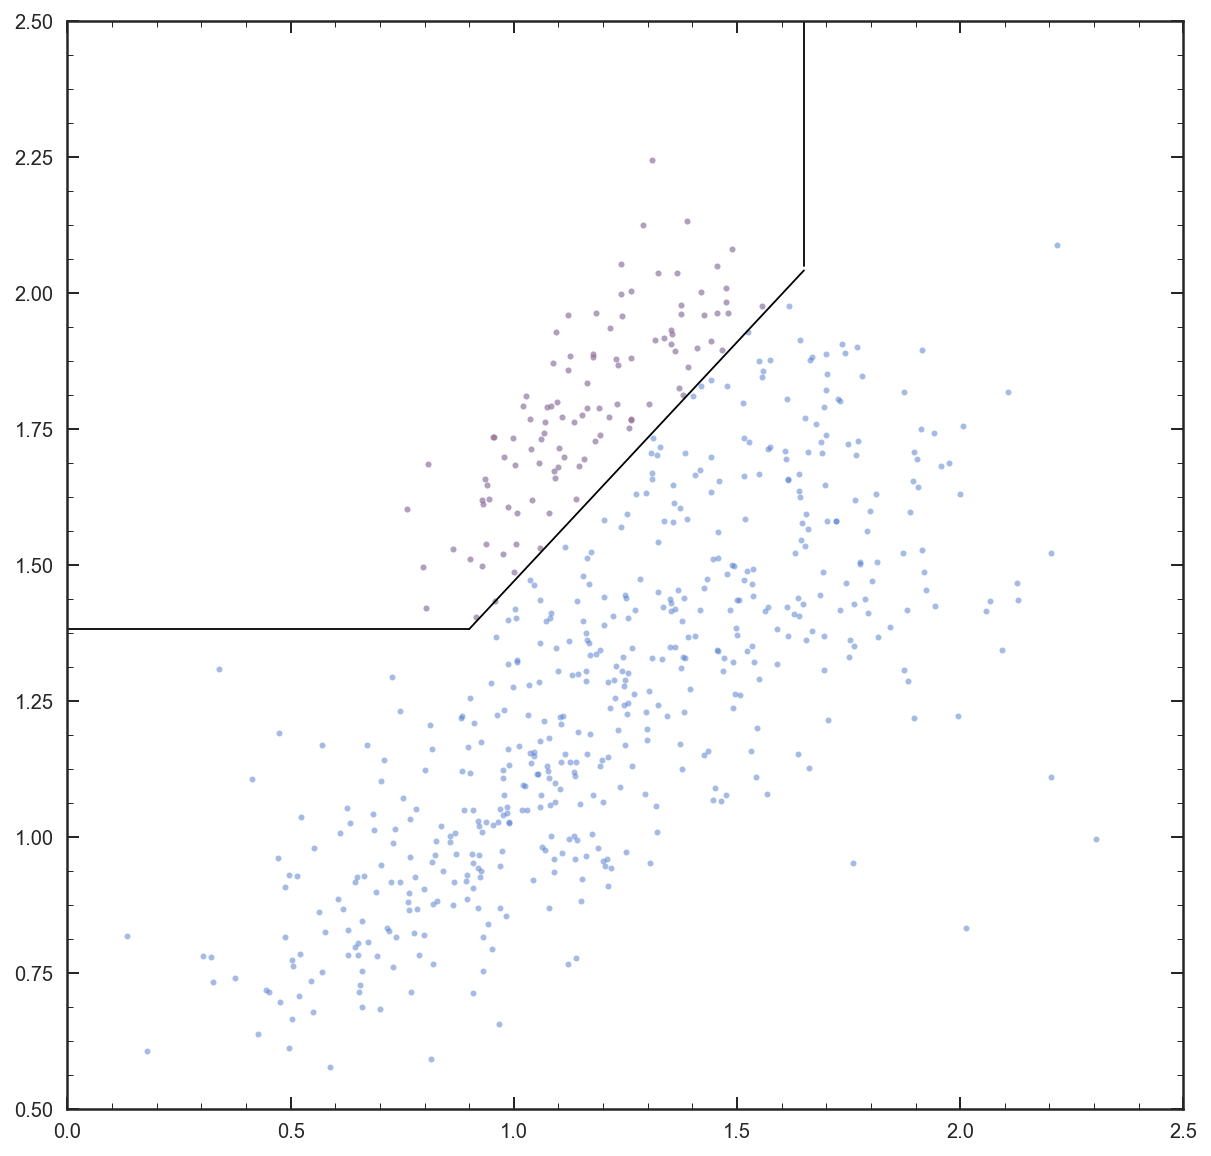

In [18]:
plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.3,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.3,ms=3)
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()

In [19]:
len(IDSQ), len(IDNQ)

(71, 34)

In [57]:
s_cand =pd.DataFrame({ 'gids' : eazy_s.id[np.array(IDS)[np.array(IDSQ)]],
    'zspec' : eazy_s.z_spec[np.array(IDS)[np.array(IDSQ)]],
    'zphot' : eazy_s.z_peak[np.array(IDS)[np.array(IDSQ)]],
    'ra' : goods_s.ra[np.array(IDS)[np.array(IDSQ)]],
    'dec' : goods_s.dec[np.array(IDS)[np.array(IDSQ)]],
    'in_out' : np.repeat('out',len(IDSQ))})

n_cand =pd.DataFrame({ 'gids' : eazy_n.id[np.array(IDN)[np.array(IDNQ)]],
    'zspec' : eazy_n.z_spec[np.array(IDN)[np.array(IDNQ)]],
    'zphot' : eazy_n.z_peak[np.array(IDN)[np.array(IDNQ)]],
    'ra' : goods_n.ra[np.array(IDN)[np.array(IDNQ)]],
    'dec' : goods_n.dec[np.array(IDN)[np.array(IDNQ)]],
    'in_out' : np.repeat('out',len(IDNQ))})

In [58]:
for i in s_cand.index:
    for ii in range(len(filelist)):
        pres,pos=Source_present(filelist[ii],s_cand.ra[i],s_cand.dec[i])
        if pres == True:
            s_cand.in_out[i]= 'in'
            break
            
for i in n_cand.index:
    for ii in range(len(filelist)):
        pres,pos=Source_present(filelist[ii],n_cand.ra[i],n_cand.dec[i])
        if pres == True:
            n_cand.in_out[i]= 'in'
            break

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [62]:
s_cand = s_cand.query('in_out == "in"')

In [63]:
n_cand = n_cand.query('in_out == "in"')

In [64]:
s_cand.to_pickle('../dataframes/galaxy_frames/s_candidates.pkl')
n_cand.to_pickle('../dataframes/galaxy_frames/n_candidates.pkl')

In [7]:
s_cand

,dec,gids,in_out,ra,zphot,zspec
26271,-27.790601,26272,in,53.150826,1.5716,-1.0
28318,-27.782060,28319,in,53.173671,1.7817,-1.0
29256,-27.777637,29257,in,53.147471,1.6824,-1.0
36175,-27.742284,36176,in,53.121006,1.7098,-1.0
38842,-27.729749,38843,in,53.107039,1.6766,-1.0
39011,-27.727621,39012,in,53.064240,1.6573,-1.0
39363,-27.726461,39364,in,53.062821,1.6970,-1.0
40222,-27.722957,40223,in,53.124956,1.6508,-1.0
40622,-27.721152,40623,in,53.130480,1.4913,-1.0
41147,-27.718885,41148,in,53.127925,1.6965,-1.0


In [2]:
s_cand = pd.read_pickle('../dataframes/galaxy_frames/s_candidates.pkl')
n_cand = pd.read_pickle('../dataframes/galaxy_frames/n_candidates.pkl')

In [15]:
g141_s_list = glob(hpath + '3dhst/s_flt_files/*flt.fits')
g141_n_list = glob(hpath + '3dhst/n_flt_files/*flt.fits')    

In [16]:
for i in s_cand.index:
    for ii in range(len(g141_s_list)):
        pres,pos=Source_present(g141_s_list[ii],s_cand.ra[i],s_cand.dec[i])
        if pres == True:
            print(s_cand.gids[i])
            print(pos)
            
for i in n_cand.index:
    for ii in range(len(g141_n_list)):
        pres,pos=Source_present(g141_n_list[ii],n_cand.ra[i],n_cand.dec[i])
        if pres == True:
            print(n_cand.gids[i])
            print(pos)

26272
[623.36280911 -94.86449742]
26272
[633.38137316 -91.47807657]
26272
[630.00225294 -84.9371703 ]
26272
[619.87188106 -88.34735649]
26272
[574.77815789 844.18844575]
26272
[584.80034129 847.58734538]
26272
[581.26435099 854.08749923]
26272
[571.27571899 850.67731505]
26272
[206.2939362  494.12610321]
26272
[216.32230456 497.66503896]
26272
[212.80746571 504.11881434]
26272
[202.80196013 500.72551935]
26272
[134.97372577 453.33857938]
26272
[145.00387702 456.84197766]
26272
[141.51973276 463.33517449]
26272
[131.54390708 459.89561194]
26272
[256.93473342 480.47248847]
26272
[266.94886764 483.93295657]
26272
[263.43909339 490.44722388]
26272
[253.45843093 486.98787325]
26272
[201.89675794 421.26998218]
26272
[211.92182726 424.75766049]
26272
[208.33645139 431.23869927]
26272
[198.38790058 427.83986542]
28319
[156.33940506 -50.28563515]
28319
[166.40162595 -46.75530722]
28319
[162.85075941 -40.18727667]
28319
[152.9949546  -43.79517844]
28319
[120.29175922 970.54327056]
28319
[130.424

KeyboardInterrupt: 

In [3]:
s_cand

,dec,gids,in_out,ra,zphot,zspec
26271,-27.790601,26272,in,53.150826,1.5716,-1.0
28318,-27.782060,28319,in,53.173671,1.7817,-1.0
29256,-27.777637,29257,in,53.147471,1.6824,-1.0
36175,-27.742284,36176,in,53.121006,1.7098,-1.0
38842,-27.729749,38843,in,53.107039,1.6766,-1.0
39011,-27.727621,39012,in,53.064240,1.6573,-1.0
39363,-27.726461,39364,in,53.062821,1.6970,-1.0
40222,-27.722957,40223,in,53.124956,1.6508,-1.0
40622,-27.721152,40623,in,53.130480,1.4913,-1.0
41147,-27.718885,41148,in,53.127925,1.6965,-1.0


In [19]:
20 * 120 * 4

9600

In [2]:
goods_s=Table.read('/Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii').to_pandas()
goods_n=Table.read('/Users/Vince.ec/Clear_data/goodsn_mosaic/goodsn_3dhstP.cat',format='ascii').to_pandas()

s_cand = pd.read_pickle('../dataframes/galaxy_frames/s_candidates.pkl')
n_cand = pd.read_pickle('../dataframes/galaxy_frames/n_candidates.pkl')

In [3]:
gs_keys = np.array(goods_s.keys())
gn_keys = np.array(goods_n.keys())

In [4]:
sflux_keys = []
serror_keys = []

for i in gs_keys:
    if i[0:2] == 'f_':
        sflux_keys.append(i)
    if i[0:2] == 'e_':
        serror_keys.append(i)
        
nflux_keys = []
nerror_keys = []

for i in gn_keys:
    if i[0:2] == 'f_':
        nflux_keys.append(i)
    if i[0:2] == 'e_':
        nerror_keys.append(i)

In [5]:
s_trans,sez_code=np.loadtxt('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.translate',dtype=str).T
n_trans,nez_code=np.loadtxt('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.translate',dtype=str).T

In [8]:
s_codes = []
s_keys = []
s_ekeys = []
n_codes = []
n_keys = []
n_ekeys = []

for i in range(len(sflux_keys)):
    if sez_code[np.argwhere(s_trans == sflux_keys[i])].size >0:
        s_codes.append(int(sez_code[np.argwhere(s_trans == sflux_keys[i])][0][0][1:]))
        s_keys.append(sflux_keys[i])
        s_ekeys.append(serror_keys[i])
        
for i in range(len(nflux_keys)):
    if nez_code[np.argwhere(n_trans == nflux_keys[i])].size >0:
        n_codes.append(int(nez_code[np.argwhere(n_trans == nflux_keys[i])][0][0][1:]))
        n_keys.append(nflux_keys[i])
        n_ekeys.append(nerror_keys[i])

In [43]:
for i in s_cand.index:
    filt = []
    ez_key = []
    eff_wvs = []
    phot = []
    phot_err = []
    for ii in range(len(s_codes)):
        if goods_s[s_keys[ii]][i] > 0:
            sw,sf,effwv=Get_Sensitivity(s_codes[ii])
            Clam = 3E18 / effwv **2 * 10**((-1.1)/2.5-29)
            filt.append(s_keys[ii][2:])
            ez_key.append(s_codes[ii])
            eff_wvs.append(effwv)
            phot.append(Clam * goods_s[s_keys[ii]][i])
            phot_err.append(Clam * goods_s[s_ekeys[ii]][i])
     
    sw,sf,effwv=Get_Sensitivity(201)
    Clam = 3E18 / effwv **2 * 10**((-1.1)/2.5-29)
    filt.append('F098M')
    ez_key.append(201)
    eff_wvs.append(effwv)
    phot.append(Clam * goods_s['f_F098M'][i])
    phot_err.append(Clam * goods_s['e_F098M'][i])
    
    phot_db = pd.DataFrame({'filter' : filt, 'EAZY_key' : ez_key, 'eff_wv' : eff_wvs,
                           'phot' : phot, 'phot_err' : phot_err})
    phot_db.to_pickle('../dataframes/phot/gs_{0}_phot.pkl'.format(s_cand.gids[i]))
    
    
for i in n_cand.index:
    filt = []
    ez_key = []
    eff_wvs = []
    phot = []
    phot_err = []
    for ii in range(len(n_codes)):
        if goods_n[n_keys[ii]][i] > 0:
            sw,sf,effwv=Get_Sensitivity(n_codes[ii])
            Clam = 3E18 / effwv **2 * 10**((-1.1)/2.5-29)
            filt.append(n_keys[ii][2:])
            ez_key.append(n_codes[ii])
            eff_wvs.append(effwv)
            phot.append(Clam * goods_n[n_keys[ii]][i])
            phot_err.append(Clam * goods_n[n_ekeys[ii]][i])
            
    phot_db = pd.DataFrame({'filter' : filt, 'EAZY_key' : ez_key, 'eff_wv' : eff_wvs,
                           'phot' : phot, 'phot_err' : phot_err})
    phot_db.to_pickle('../dataframes/phot/gn_{0}_phot.pkl'.format(n_cand.gids[i]))

In [24]:
n_cand

,dec,gids,in_out,ra,zphot,zspec
6283,62.172293,6284,in,189.199728,1.7560,-1.0000
8465,62.184931,8466,in,189.156533,1.7063,-1.0000
11813,62.200346,11814,in,189.217095,1.6698,-1.0000
13116,62.206599,13117,in,189.260877,1.6337,-1.0000
14139,62.212455,14140,in,189.183830,1.6940,-1.0000
21426,62.247344,21427,in,189.368121,1.4759,-1.0000
23025,62.254732,23026,in,189.032759,1.4788,-1.0000
23253,62.255761,23254,in,189.349606,1.4561,-1.0000
32690,62.307165,32691,in,189.347593,1.4266,-1.0000
33092,62.310363,33093,in,189.331982,1.4674,1.5198


In [25]:
s_cand

,dec,gids,in_out,ra,zphot,zspec
26271,-27.790601,26272,in,53.150826,1.5716,-1.0
28318,-27.782060,28319,in,53.173671,1.7817,-1.0
29256,-27.777637,29257,in,53.147471,1.6824,-1.0
36175,-27.742284,36176,in,53.121006,1.7098,-1.0
38842,-27.729749,38843,in,53.107039,1.6766,-1.0
39011,-27.727621,39012,in,53.064240,1.6573,-1.0
39363,-27.726461,39364,in,53.062821,1.6970,-1.0
40222,-27.722957,40223,in,53.124956,1.6508,-1.0
40622,-27.721152,40623,in,53.130480,1.4913,-1.0
41147,-27.718885,41148,in,53.127925,1.6965,-1.0


In [38]:
for i in n_cand.index:
    p_file = glob('../dataframes/phot/*{0}*'.format(n_cand.gids[i]))[0]
    dat = pd.read_pickle(p_file)
    print(dat.query('filter == "F850LP"')['phot'].values)

[3.84408095e-20]
[4.23481863e-19]
[6.89412686e-20]
[1.90429397e-19]
[3.7373196e-19]
[5.30562923e-19]
[1.49544545e-19]
[2.48897002e-19]
[1.30274799e-19]
[3.14590391e-19]
[4.22947048e-19]
[3.96661115e-19]
[9.73296248e-20]
[8.12215803e-20]
[4.48057545e-20]
[3.64634188e-20]


In [30]:
glob('../dataframes/phot/*{0}*'.format(s_cand.gids[s_cand.index[0]]))[0]

'../dataframes/phot/gs_26272_phot.pkl'

In [37]:
np.array([n_keys,n_codes]).T

array([['f_F160W', '205'],
       ['f_U', '227'],
       ['f_F435W', '233'],
       ['f_B', '114'],
       ['f_G', '229'],
       ['f_V', '115'],
       ['f_F606W', '236'],
       ['f_R', '116'],
       ['f_Rs', '231'],
       ['f_I', '117'],
       ['f_F775W', '238'],
       ['f_Z', '118'],
       ['f_F850LP', '240'],
       ['f_F125W', '203'],
       ['f_J', '224'],
       ['f_F140W', '204'],
       ['f_H', '225'],
       ['f_Ks', '226'],
       ['f_IRAC1', '18'],
       ['f_IRAC2', '19'],
       ['f_IRAC3', '20'],
       ['f_IRAC4', '21']], dtype='<U8')

In [41]:
sflux_keys

['f_F160W',
 'f_U50',
 'f_U38',
 'f_U',
 'f_F435W',
 'f_B',
 'f_V',
 'f_F606Wcand',
 'f_F606W',
 'f_R',
 'f_Rc',
 'f_F775W',
 'f_I',
 'f_F814Wcand',
 'f_F850LP',
 'f_F850LPcand',
 'f_F098M',
 'f_F105W',
 'f_F125W',
 'f_J',
 'f_tenisJ',
 'f_F140W',
 'f_H',
 'f_tenisK',
 'f_Ks',
 'f_IRAC1',
 'f_IRAC2',
 'f_IRAC3',
 'f_IRAC4',
 'f_IA427',
 'f_IA445',
 'f_IA464',
 'f_IA484',
 'f_IA505',
 'f_IA527',
 'f_IA550',
 'f_IA574',
 'f_IA598',
 'f_IA624',
 'f_IA651',
 'f_IA679',
 'f_IA709',
 'f_IA738',
 'f_IA767',
 'f_IA797',
 'f_IA827',
 'f_IA856']